In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


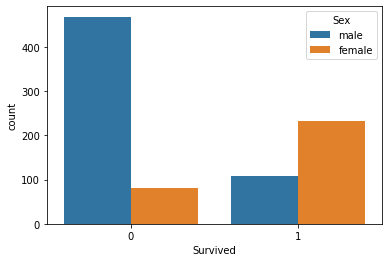

In [5]:
sns.countplot(x='Survived',hue='Sex',data=train)

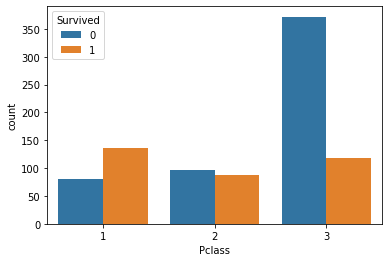

In [6]:
sns.countplot(x='Pclass',hue='Survived',data=train)

In [7]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

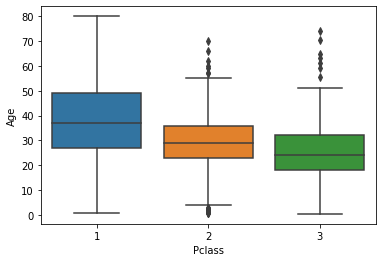

In [9]:
sns.boxplot(x='Pclass',y='Age',data=train)

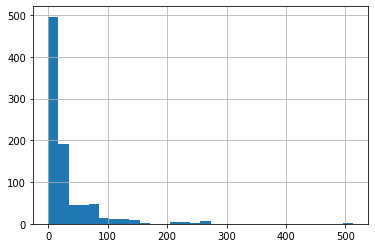

In [10]:
train['Fare'].hist(bins=30)

In [11]:
def imputeage(cols):
    Age = cols[0]
    pclass = cols[1]
    if pd.isnull(Age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 27
    else:
        return Age

In [12]:
train['Age']= train[['Age','Pclass']].apply(imputeage,axis=1)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
train.drop('Cabin',axis=1,inplace=True)

In [15]:
train.dropna(inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
train['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
train['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
train['SibSp']=train['SibSp'].astype('category')
train['Parch']=train['Parch'].astype('category')

In [21]:
encodedDF = pd.get_dummies(train[['Embarked','Sex','SibSp','Parch']])

In [22]:
X = pd.concat([encodedDF,train.drop(['PassengerId','Name','Ticket','Survived','Embarked','Sex','SibSp','Parch'],axis=1)],axis=1)

In [23]:
#X = train.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y= train['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()

In [28]:
log.fit(X_train,y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
log.intercept_

array([1.14908115])

In [30]:
log.coef_

array([[ 4.03123391e-01,  5.82044034e-01,  4.38886897e-03,
         1.76846901e+00, -7.78912718e-01,  8.76271243e-01,
         8.35317778e-01,  3.09340428e-01, -5.19034596e-01,
        -6.25223374e-02, -1.81212027e-01, -2.68604195e-01,
         4.52769841e-01,  7.88397160e-01,  1.34648764e-01,
         1.85718283e-01, -3.38556834e-01, -2.33420920e-01,
         0.00000000e+00, -1.04592487e+00, -3.18765692e-02,
         9.60862637e-04]])

In [31]:
predict = log.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [33]:
print(accuracy_score(y_test,predict))

0.8089887640449438


In [34]:
print(confusion_matrix(y_test,predict))

[[98  9]
 [25 46]]


In [35]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       107
           1       0.84      0.65      0.73        71

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178



In [36]:
print(roc_auc_score(y_test,predict))

0.7818875872054759


In [53]:
pred_prob = log.predict_proba(X_test)
pred_prob.ndim

2

In [63]:
pred_prob[::,0]

array([0.90780374, 0.84680279, 0.25021345, 0.08120498, 0.84583425,
       0.96066802, 0.90383305, 0.79118072, 0.92704242, 0.30914208,
       0.2287603 , 0.04544701, 0.90781614, 0.2753931 , 0.90768707,
       0.88737069, 0.09799529, 0.12822944, 0.42008023, 0.90781614,
       0.90775447, 0.91024351, 0.61626301, 0.68795164, 0.95485178,
       0.54808234, 0.40915233, 0.27281685, 0.92671959, 0.72786496,
       0.84628212, 0.66954897, 0.97566045, 0.90236119, 0.89952984,
       0.79627501, 0.22604404, 0.94079067, 0.81689568, 0.87756692,
       0.42973005, 0.87399253, 0.89052486, 0.09058326, 0.40428092,
       0.88425354, 0.41225894, 0.16204424, 0.90656828, 0.75782609,
       0.55214954, 0.21987099, 0.81578176, 0.88717929, 0.90788413,
       0.93326123, 0.56062698, 0.9203045 , 0.88725076, 0.0741797 ,
       0.30914208, 0.08396238, 0.10310446, 0.90244553, 0.85879986,
       0.95348149, 0.893642  , 0.60652961, 0.94593157, 0.85109922,
       0.67560661, 0.86866005, 0.39678306, 0.10575076, 0.89473

In [39]:
predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [40]:
pred_prob

array([[0.90780374, 0.09219626],
       [0.84680279, 0.15319721],
       [0.25021345, 0.74978655],
       [0.08120498, 0.91879502],
       [0.84583425, 0.15416575],
       [0.96066802, 0.03933198],
       [0.90383305, 0.09616695],
       [0.79118072, 0.20881928],
       [0.92704242, 0.07295758],
       [0.30914208, 0.69085792],
       [0.2287603 , 0.7712397 ],
       [0.04544701, 0.95455299],
       [0.90781614, 0.09218386],
       [0.2753931 , 0.7246069 ],
       [0.90768707, 0.09231293],
       [0.88737069, 0.11262931],
       [0.09799529, 0.90200471],
       [0.12822944, 0.87177056],
       [0.42008023, 0.57991977],
       [0.90781614, 0.09218386],
       [0.90775447, 0.09224553],
       [0.91024351, 0.08975649],
       [0.61626301, 0.38373699],
       [0.68795164, 0.31204836],
       [0.95485178, 0.04514822],
       [0.54808234, 0.45191766],
       [0.40915233, 0.59084767],
       [0.27281685, 0.72718315],
       [0.92671959, 0.07328041],
       [0.72786496, 0.27213504],
       [0.

In [41]:
pred_DB = np.where(pred_prob[:,0]>=0.5,0,1)

In [42]:
accuracy_score(predict,pred_DB)

1.0